# Desarrollo del Análisis de Rotación de Empleados
Se refiere a la cantidad de empleados que dejan una empresa y son reemplazados en un período de tiempo determinado.
Objetivo: Análisis descriptivo de la rotación voluntaria de empleados pueden estar influenciados por múltiples factores.
Pero... ¿Qué es exactamente la rotación? Se refiere a la cantidad de empleados que dejan una empresa generando su próximo reemplazo.
Las causas principales pueden ser : Renuncias voluntarias (empleados que consiguen otro trabajo o renuncian por motivos personales); Despidos (por bajo rendimiento o reestructuración); Jubilaciones (en algunos casos).

Objetivo metodológico:

1.- Análisis Descriptivo: Nos enfocamos en resumir y describir los datos sin sacar conclusiones profundas.
Técnicas usadas: tablas, gráficos de barras, histogramas, medidas de tendencia central (media, mediana, moda).

2.- Análisis Diagnóstico: Quisimos encontrar las relaciones y causas de los datos descritos.
Técnicas usadas: correlaciones, segmentaciones y análisis de tendencias fundamental (gráficos de líneas).

Hemos estructurado cada análisis en dos partes:

1. Análisis Bivariado (Relacionar variables y encontrar patrones).

2. Visualización del Análisis (Gráficos clave para entender el problema).

### Correlación entre las Variables del DataFrame tras su Limpieza en la Fase 2

# 1.- Análisis Descriptivo de las Variables

In [1]:
# Importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluamos la linealidad de las relaciones entre las variables
# ------------------------------------------------------------------------------
from scipy.stats import shapiro, kstest

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")


En primer lugar, creamos un DataFrame tras la lectura del archivo .csv, el cual contiene los datos de los empleados que nos ha entregado la empresa.

In [2]:
df_analisis = pd.read_csv('../Fase2_Nulos/df_filtrado_notnulls.csv')

In [ ]:
# Observación de los datos
df_analisis.sample(5)

,employee_turnover,business_travel_frequency,distance_from_home_km,education_level,environmental_satisfaction_level,gender,job_involvement_level,job_level,job_satisfaction_level,marital_status,num_companies_worked,overtime_hours,percent_salary_hike,standard_work_hours,stock_option_level,training_sessions_last_year,years_at_company,years_with_current_manager,birth_year,remote_work,total_years_worked,annual_salary,work_life_balance
792,no,unknown,20.0,3,4.0,male,3,2,3,unknown,8,no,15,part_time,0,3,5,1,1978,yes,10.0,48500.00,3.0
142,no,travel_rarely,1.0,3,4.0,female,3,1,2,unknown,0,yes,21,none,1,2,11,7,1993,yes,12.0,35790.00,3.0
584,no,travel_rarely,10.0,3,3.0,male,3,1,1,unknown,6,no,20,part_time,1,3,5,3,1986,yes,10.0,28111.13,3.0
656,no,travel_rarely,7.0,4,2.0,female,3,2,3,single,1,no,14,full_time,0,2,10,9,1990,no,10.0,54870.00,2.0
93,no,unknown,25.0,4,3.0,male,3,3,3,divorced,1,yes,11,part_time,1,3,16,1,1988,yes,10.0,100071.84,2.0


In [ ]:
# Análisis descriptivo numérico de las variables numéricas
df_analisis.describe().T

,count,mean,std,min,25%,50%,75%,max
distance_from_home_km,1614.0,8.667286,7.459181,1.0,2.0,7.00,11.0,29.0
education_level,1614.0,2.925031,1.022357,1.0,2.0,3.00,4.0,5.0
environmental_satisfaction_level,1614.0,2.731722,1.065969,1.0,2.0,3.00,4.0,4.0
job_involvement_level,1614.0,2.739777,0.711567,1.0,2.0,3.00,3.0,4.0
job_level,1614.0,2.068154,1.101344,1.0,1.0,2.00,3.0,5.0
job_satisfaction_level,1614.0,2.738538,1.106163,1.0,2.0,3.00,4.0,4.0
num_companies_worked,1614.0,2.673482,2.506152,0.0,1.0,2.00,4.0,9.0
percent_salary_hike,1614.0,15.165428,3.648610,11.0,12.0,14.00,18.0,25.0
stock_option_level,1614.0,0.791202,0.842396,0.0,0.0,1.00,1.0,3.0
training_sessions_last_year,1614.0,2.809789,1.297765,0.0,2.0,3.00,3.0,6.0


### Correlación entre las Variables Numéricas del DataFrame tras su Limpieza en la Fase 2

# 1. Análisis Bivariado: Buscando Factores que afectan a la rotación

### Estableciendo Correlaciones Numéricas

La correlación de Pearson es útil porque mide la relación lineal entre dos variables numéricas. Nos ayuda a responder preguntas como:

    ❇️ ¿Qué factores influyen en el abandono de empleados?
    ❇️ ¿Existe relación entre el salario y la satisfacción laboral?
    ❇️ ¿A mayor distancia del trabajo, hay más rotación?

Nos ayuda a visualizar patrones ocultos: Algunas relaciones no son obvias sin un análisis de correlación. Por ejemplo: Si "work_life_balance" y "employee_turnover" tienen correlación negativa fuerte, mejorar el equilibrio vida-trabajo puede reducir la rotación.

▶️¿Cómo funciona?
La correlación de Pearson devuelve un valor entre -1 y 1:

    🔸 Cerca de +1 → Relación positiva fuerte (Si una variable sube, la otra también)
    🔸 Cerca de -1 → Relación negativa fuerte (Si una sube, la otra baja)
    🔸 Cerca de 0 → No hay relación lineal

In [7]:
df_correlaciones = df_analisis.select_dtypes(include=['number']).corr(method="pearson")
df_correlaciones

,distance_from_home_km,education_level,environmental_satisfaction_level,job_involvement_level,job_level,job_satisfaction_level,num_companies_worked,percent_salary_hike,stock_option_level,training_sessions_last_year,years_at_company,years_with_current_manager,birth_year,total_years_worked,annual_salary,work_life_balance
distance_from_home_km,1.000000,0.027864,-0.019420,0.020938,0.008120,0.004403,-0.007573,0.057036,0.067375,-0.051308,0.010439,0.013331,0.003625,-0.000816,-0.012235,-0.032258
education_level,0.027864,1.000000,-0.037240,0.043048,0.100346,-0.006928,0.116021,-0.009138,0.012767,-0.039725,0.070010,0.068201,-0.201536,0.125259,0.093245,0.021237
environmental_satisfaction_level,-0.019420,-0.037240,1.000000,-0.007909,0.007135,0.008300,-0.001017,-0.040069,0.008002,-0.048562,0.008301,-0.004162,-0.015337,0.012955,0.009222,0.047702
job_involvement_level,0.020938,0.043048,-0.007909,1.000000,-0.000297,-0.020332,0.026374,-0.004661,0.035480,-0.012010,-0.015409,0.040507,-0.036568,0.022475,-0.017915,-0.013044
job_level,0.008120,0.100346,0.007135,-0.000297,1.000000,-0.015388,0.143060,-0.041995,0.022030,-0.026059,0.532415,0.365260,-0.507748,0.620530,0.882054,0.021209
job_satisfaction_level,0.004403,-0.006928,0.008300,-0.020332,-0.015388,1.000000,-0.054967,0.027774,0.013897,0.003339,-0.006868,-0.034596,0.010725,-0.024691,0.000526,-0.024389
num_companies_worked,-0.007573,0.116021,-0.001017,0.026374,0.143060,-0.054967,1.000000,-0.003378,0.039339,-0.080868,-0.129465,-0.119690,-0.289166,0.210844,0.110463,-0.012054
percent_salary_hike,0.057036,-0.009138,-0.040069,-0.004661,-0.041995,0.027774,-0.003378,1.000000,0.011043,-0.006836,-0.041213,-0.010821,-0.006728,-0.031841,-0.029821,0.001218
stock_option_level,0.067375,0.012767,0.008002,0.035480,0.022030,0.013897,0.039339,0.011043,1.000000,0.007315,0.013781,0.027543,-0.039405,0.050299,0.014915,-0.006032
training_sessions_last_year,-0.051308,-0.039725,-0.048562,-0.012010,-0.026059,0.003339,-0.080868,-0.006836,0.007315,1.000000,0.008089,0.008678,0.031776,-0.063411,-0.025426,0.018330


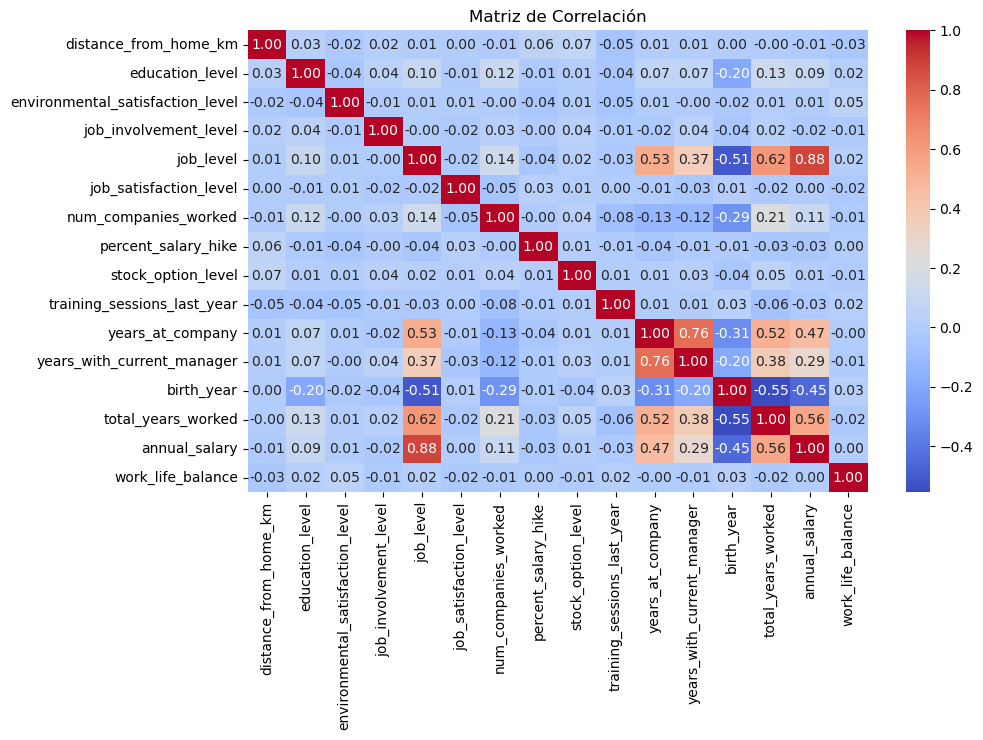

In [ ]:
# Para ver la información de manera más intuitiva elaboramos un gráfico de tipo heatmap 
# en el que se puede obervar el nivel de las correlaciones entre avriables numéricas en función  
# del color del índice de la matriz.

plt.figure(figsize=(10, 6))
sns.heatmap(df_correlaciones, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

## Análisis de la Matriz de Correlación

🔻 **Correlaciones más fuertes (+0.5 o más)**

1. "annual_salary" y "job_level"(0.88): Cuanto más alto es el nivel del puesto, mayor es el salario. Tiene lógica pues los ascensos llevan a mejores sueldos.
2. "years_at_company" y "years_with_current_manager" (0.76):  Si un empleado lleva más tiempo en la empresa, también ha estado con su gerente por más tiempo. Indica estabilidad en los equipos de trabajo.
3. "total_years_worked" y "years_at_company" (0.52): Los empleados que han trabajado más años en otras empresas también llevan más tiempo en la empresa actual.
4. "years_at_company" y "job_level" (0.53): Los empleados con más años en la empresa tienden a estar en niveles laborales más altos.

🔻 **Correlaciones negativas fuertes (-0.5 o menos)**

1. "birth_year" está fuertemente correlacionado de manera negativa con total_years_worked (-0.55) y annual_salary (-0.56).** Esto sugiere que cuanto más joven es un empleado, menos años ha trabajado en otras empresas y tienen salarios más bajos. 
2. "job_level" y "birth_year" (-0.51): Los empleados más jóvenes suelen estar en niveles laborales más bajos.

🔻 **Correlaciones moderadas (0.2 a 0.5)**

1. "years_at_company" y "annual_salary" (0.47): Cuanto más tiempo en la empresa, mayor es el salario. La antigüedad es recompensada.
2. "num_companies_worked" tiene una relación positiva con "total_years_worked" (0.21), lo que sugiere que las personas con más experiencia laboral han cambiado más de empresa.
3. "education_level" tiene una correlación algo moderada con "total_years_worked" (0.12), pero una correlación negativa con "birth_year" (-0.20), lo que indica que los empleados mayores pueden haber tenido menos nivel educativo en promedio.

# *Conclusiones del Análisis de Correlaciones*

*Parece que la empresa no recompensa a los nuevos empleados, podría ser complicado acceder a un puesto alto con sueldo superior sin haber logrado una estabilidad en la empresa. Sería interesante estudiar la información sobre las condiciones laborales de los empleados que llevan menos tiempo en la empresa.*

*En cambio, "environmental_satisfaction_level", "job_satisfaction_level"" y "work_life_balance" tienen correlaciones bajas con otras variables. Esto podría indicar que la satisfacción laboral es más subjetiva y menos dependiente de factores numéricos como el salario o los años trabajados.*

## Medidas de Correlación: Relacionando Columnas

In [9]:
from itertools import combinations
# definimos la lista los nombres de las variables numéricas 
numericas = df_analisis.select_dtypes(include = np.number).columns
# usando el metodo 'combinations' vamos a generar todas las combinaciones posibles de columnas
combinaciones = list(combinations(numericas, 2))
combinaciones

[('distance_from_home_km', 'education_level'),
 ('distance_from_home_km', 'environmental_satisfaction_level'),
 ('distance_from_home_km', 'job_involvement_level'),
 ('distance_from_home_km', 'job_level'),
 ('distance_from_home_km', 'job_satisfaction_level'),
 ('distance_from_home_km', 'num_companies_worked'),
 ('distance_from_home_km', 'percent_salary_hike'),
 ('distance_from_home_km', 'stock_option_level'),
 ('distance_from_home_km', 'training_sessions_last_year'),
 ('distance_from_home_km', 'years_at_company'),
 ('distance_from_home_km', 'years_with_current_manager'),
 ('distance_from_home_km', 'birth_year'),
 ('distance_from_home_km', 'total_years_worked'),
 ('distance_from_home_km', 'annual_salary'),
 ('distance_from_home_km', 'work_life_balance'),
 ('education_level', 'environmental_satisfaction_level'),
 ('education_level', 'job_involvement_level'),
 ('education_level', 'job_level'),
 ('education_level', 'job_satisfaction_level'),
 ('education_level', 'num_companies_worked'),
 ('

## Analizaremos más adelante las variables categóricas ordinales como categorías con un orden lógico numeradas no como variables numéricas discretas:
'job_satisfaction_level', 'stock_option_level', 'work_life_balance', 'job_level', 'environmental_satisfaction_level', 'education_level' y 'job_involvement_level'.

A continuación utilizamos un gráfico de dispersión para identificar relaciones, ver la distribución de puntos en estas variables numéricas y categóricas numéricas.

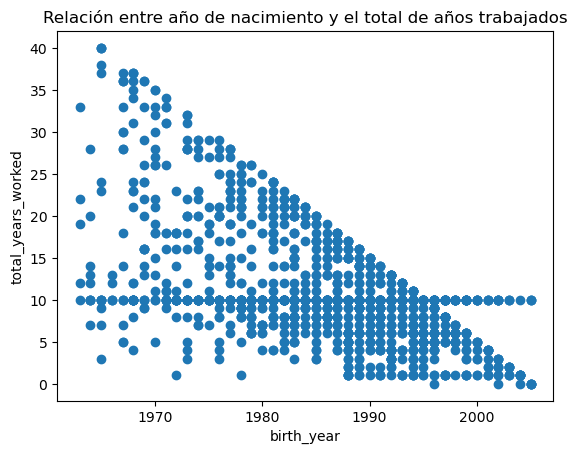

In [10]:
import matplotlib.pyplot as plt
# Crear un gráfico de dispersión para cada una de las combinaciones de variables
plt.scatter(df_analisis['birth_year'], df_analisis['total_years_worked'])
plt.xlabel('birth_year')
plt.ylabel('total_years_worked')
plt.title("Relación entre año de nacimiento y el total de años trabajados")
plt.show()

In [ ]:
'''
Esta gráfica muestra la relación negativa fuerte entre el año de nacimiento
y el total de años trabajados. A medida que el año de nacimiento aumenta (es decir, cuanto más joven es la persona),
el total de años trabajados es menor.
Los trabajadores más antiguos (nacidos antes de 1970) pueden haber trabajado hasta 40 años.
Los nacidos después del 2000 tienen pocos o ningún año trabajado.

Podemos destacar que hay una franja horizontal en el valor de 10 años trabajados. Esto puede deberse a: 
- Políticas de retiro o jubilación.
- Redondeo en los datos.
- Errores en la recolección de datos.'
'''

"\nEsta gráfica muestra la relación negativa fuerte entre el año de nacimiento'\ny el total de años trabajados. A medida que el año de nacimiento aumenta (es decir, cuanto más joven es la persona),\nel total de años trabajados es menor.\nLos trabajadores más antiguos (nacidos antes de 1970) pueden haber trabajado hasta 40 años.\nLos nacidos después del 2000 tienen pocos o ningún año trabajado.\n\nPodemos destacar que hay una franja horizontal en el valor de 10 años trabajados. Esto puede deberse a: \n- Políticas de retiro o jubilación.\n- Redondeo en los datos.\n- Errores en la recolección de datos.'\n"

Text(0.5, 1.0, 'Distribución de los años trabajados en la empresa')

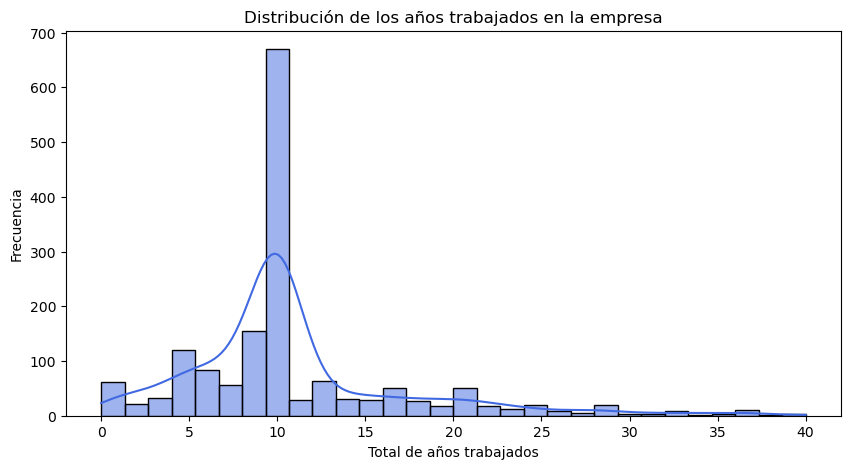

In [12]:
# Para comprobar que no hay redondeo ni errores en los datos, vamos a ver la distribución de los años trabajados
# Verificar la distribución de los años trabajados
# Crear un histograma para ver la distribución de los años trabajados
plt.figure(figsize=(10, 5))
sns.histplot(df_analisis["total_years_worked"], bins=30, kde=True, color="royalblue")
# Etiquetas y título
plt.xlabel("Total de años trabajados")
plt.ylabel("Frecuencia")
plt.title("Distribución de los años trabajados en la empresa")

In [13]:
df_analisis["total_years_worked"].value_counts().head(10)


total_years_worked
10.0    670
8.0      86
6.0      84
9.0      69
5.0      66
7.0      56
4.0      54
1.0      53
12.0     34
3.0      32
Name: count, dtype: int64

In [14]:
'''Hay una frecuencia destacada en 10 años. Esto puede deberse a políticas de la empresa (por ejemplo, revisiones de carrera cada 10 años)'
o simplemente una tendencia natural en los empleados.
'''

"Hay una frecuencia destacada en 10 años. Esto puede deberse a políticas de la empresa (por ejemplo, revisiones de carrera cada 10 años)'\no simplemente una tendencia natural en los empleados.\n"

**Tras saber esto, vamos a analizar la edad y retención: ¿Hay un punto en el que los empleados parecen abandonar la empresa?**
- Relacionamos una variable numérica discreta y una categórica nominal:

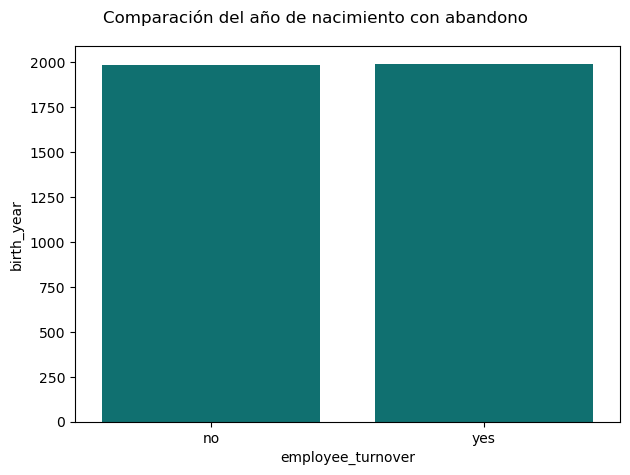

In [52]:

sns.barplot(x= "employee_turnover",
            y= "birth_year",
            data=df_analisis,
            color="teal")

# añadimos título al conjunto de todas las gráficas usando '.suptitle()'
plt.suptitle("Comparación del año de nacimiento con abandono")

# añadimos el 'plt.tigth_layout()' para que se ajusten los elementos de la gráfica
plt.tight_layout()

In [ ]:
''' No hay relación entre edad y abandono'''

 **¿Qué variables son más útiles para entender la rotación?**

- Si "work_life_balance" tuviera una correlación negativa con "employee_turnover", significaría que el equilibrio vida-trabajo influye en la rotación.
- Si "distance_from_home_km" tuviera una correlación positiva con la rotación, los empleados que viven más lejos podrían estar dejando la empresa.

## **Estrategia para comprobar posibles hipótesis:**

🔸 Revisar si los empleados jóvenes con bajo salario y bajo nivel de puesto son los que menos nivel de satisfacción tienen.
🔸Relacionar rotación y nivel de satisfacción.
🔸Analizar si los empleados que viajan con frecuencia (business_travel_frequency) están más insatisfechos.

### Estableciendo Relaciones entre Variables Categóricas y Numéricas
Realizamos gráficos de barras (contplots) para interpretar los datos.

In [16]:
df_categ = df_analisis.select_dtypes(include = 'object')

In [17]:
df_categ.describe().T

,count,unique,top,freq
employee_turnover,1614,2,no,1355
business_travel_frequency,1614,4,unknown,772
gender,1614,2,female,971
marital_status,1614,4,unknown,651
overtime_hours,1614,3,no,682
standard_work_hours,1614,3,part_time,888
remote_work,1614,2,yes,1000


- Analizamos la relación entre la distancia trabajo-hogar con la rotación de empleados:

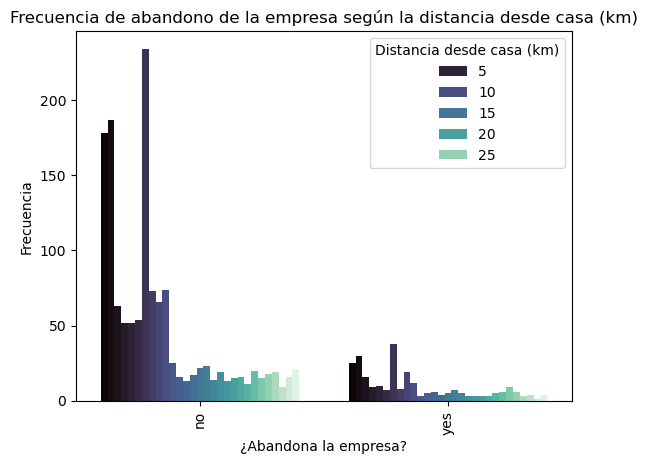

In [18]:
sns.countplot(x="employee_turnover", 
              data=df_analisis, 
              palette="mako", 
              hue="distance_from_home_km")
              
 # añadir nombre a hue 
plt.legend(title="Distancia desde casa (km)", loc='upper right')
# giramos las etiquetas del eje "x",  
plt.xticks(rotation=90)

# cambiamos el nombre de los ejes usando los métodos 'plt.ylabel()' y 'plt.xlabel()'
plt.xlabel("¿Abandona la empresa?")
plt.ylabel("Frecuencia")
plt.title("Frecuencia de abandono de la empresa según la distancia desde casa (km)")
plt.show()

- Analizamos la relación entre el tipo de jornada laboral con la rotación de empleados:

Text(0.5, 1.0, 'Rotación de Empleados por Horas Estándar de Trabajo')

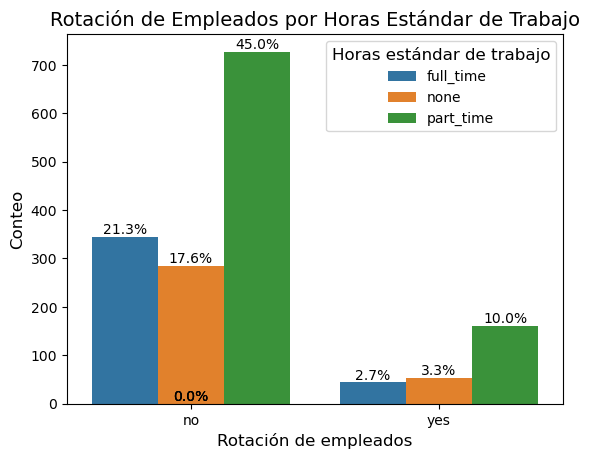

In [ ]:

# Creamos el gráfico de barras
ax = sns.countplot(x='employee_turnover', hue='standard_work_hours', data=df_categ)

# Añadimos etiquetas a los ejes
ax.set_xlabel('Rotación de empleados', fontsize=12)
ax.set_ylabel('Frecuencia', fontsize=12)

# Añadimos título a la leyenda
ax.legend(title='Horas estándar de trabajo', title_fontsize=12)

# Calculamos y añadimos porcentajes en cada barra
total_counts = len(df_categ)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total_counts:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=10)

# Añadimos título al gráfico
plt.title('Rotación de Empleados por Horas Estándar de Trabajo', fontsize=14)

# Mostramos el gráfico

In [ ]:
''' Podemos observar que el tipo de jornada de trabajo no afecta a la rotación pero puede afectar a la satisfaacción
'''

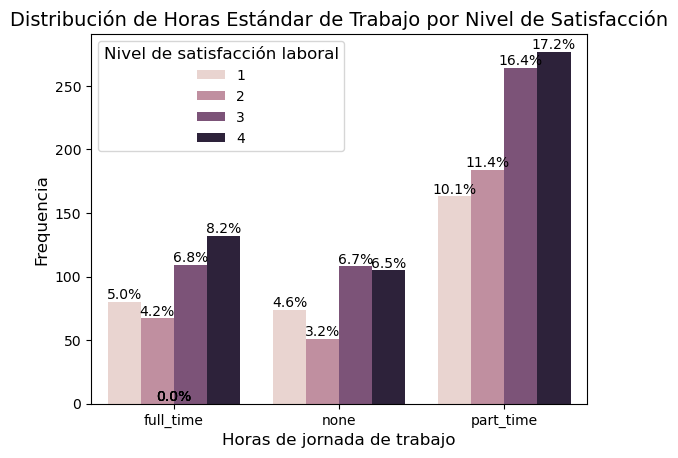

In [41]:
# Creamos el gráfico de barras
ax = sns.countplot(x='standard_work_hours', hue='job_satisfaction_level', data=df_analisis)

# Añadimos etiquetas a los ejes
ax.set_xlabel('Horas de jornada de trabajo', fontsize=12)
ax.set_ylabel('Frequencia', fontsize=12)

# Añadimos título a la leyenda
ax.legend(title='Nivel de satisfacción laboral', title_fontsize=12)

# Calculamos y añadimos porcentajes en cada barra
total_counts = len(df_analisis)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total_counts:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=10)

# Mostramos el gráfico
plt.title('Distribución de Horas Estándar de Trabajo por Nivel de Satisfacción', fontsize=14)
plt.show()

In [ ]:
''' Podemos observar que en la jornada completa "full_time" 
al satisfacción de los empleados tiende a ser más baja 
sabiendo que estos empleados son aproximadamente un 10% del total'''

In [40]:
df_analisis["standard_work_hours"].value_counts(normalize=True) * 100


standard_work_hours
part_time    55.018587
full_time    24.039653
none         20.941760
Name: proportion, dtype: float64

**Resultado 1: Las horas de jornada laboral es un factor que influye  negativamente en la satisfacción**

**Pero ... ¿influye la satisfacción en la rotación?
Lo vemos ahora:**

*Variables de satisfacción:
    'job_satisfaction_level', 'work_life_balance', 'environmental_satisfaction_level',  y 'job_involvement_level'*

Por otro lado es interesante analizar la satisfacción con otras variables categóricas ordinales: 'stock_option_level', 'job_level', 'education_level', "business_travel_frequency" 

Finalmente veremos la relación de satisfacción con las siguientes variables cualitativas:  "employee_turnover", "overtime_hour", "standard_work_hours", "gender", "marital_status", "remote_work".

### Estableciendo Relaciones entre Variables Categóricas


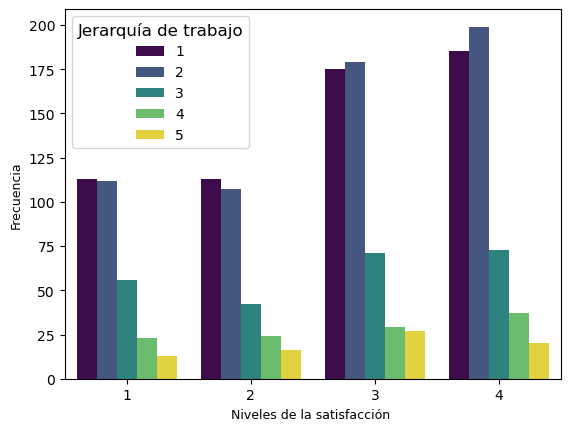

In [56]:
# ¿Qué nivel jerárquico de trabajo es el que menos satisfacción?
sns.countplot(x = "job_satisfaction_level", 
              data = df_analisis, 
              palette = "viridis", 
              hue = "job_level")
# Añadimos título a la leyenda
plt.legend(title='Jerarquía de trabajo', title_fontsize=12)
# cambiamos el nombre de los ejes usando los métodos 'plt.ylabel()' y 'plt.xlabel()'
plt.xlabel("Niveles de la satisfacción ", fontsize = 9)
plt.ylabel("Frecuencia",  fontsize = 9); 

### Género (gender) vs. Rotación

    ¿Hay diferencias en la rotación entre hombres y mujeres?

Trabajo Remoto (remote_work) vs. Rotación

    ¿Los empleados remotos tienen menor rotación que los presenciales?

Horas Extra (overtime_hours) vs. Rotación

    ¿Los empleados que hacen horas extra tienen más probabilidades de renunciar?

Frecuencia de Viajes (business_travel_frequency) vs. Rotación

    ¿Viajar más está relacionado con mayor rotación?

Estado Civil (marital_status) vs. Rotación

    ¿El estado civil influye en la permanencia en la empresa?

## ROTACIÓN DE EMPLEADOS SEGÚN SU GÉNERO

<Axes: xlabel='employee_turnover', ylabel='count'>

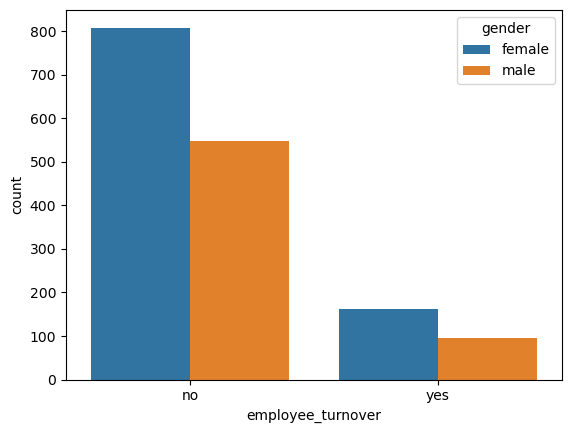

In [20]:
sns.countplot(x='employee_turnover',hue = 'gender',data=df_categ)

#### COMENTAR GRÁFICA

## ROTACIÓN DE EMPLEADOS SEGÚN SU FRECUENCIA DE VIAJES

<Axes: xlabel='employee_turnover', ylabel='count'>

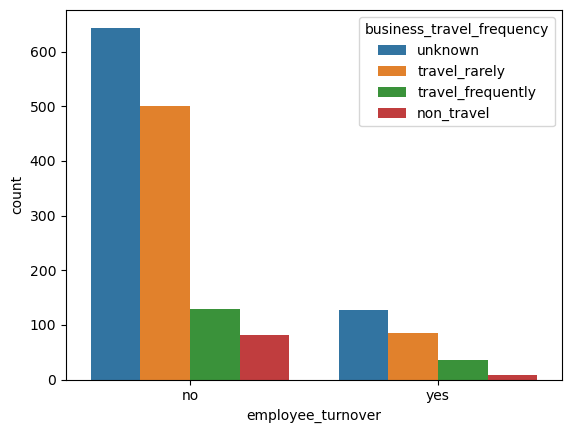

In [21]:
sns.countplot(x='employee_turnover',hue = 'business_travel_frequency',data=df_categ)

#### COMENTAR GRÁFICA

### ROTACIÓN DE EMPLEADOS SEGÚN SU ESTADO CIVIL

<Axes: xlabel='employee_turnover', ylabel='count'>

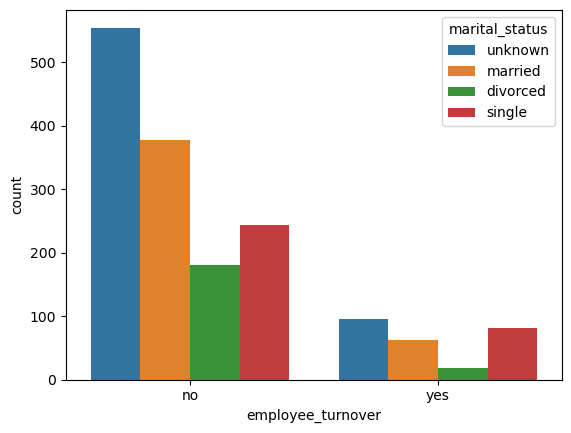

In [22]:
sns.countplot(x='employee_turnover',hue = 'marital_status',data=df_categ)

#### COMENTAR GRÁFICA

## ROTACIÓN DE EMPLEADOS SEGÚN LAS HORAS EXTRAS

<Axes: xlabel='employee_turnover', ylabel='count'>

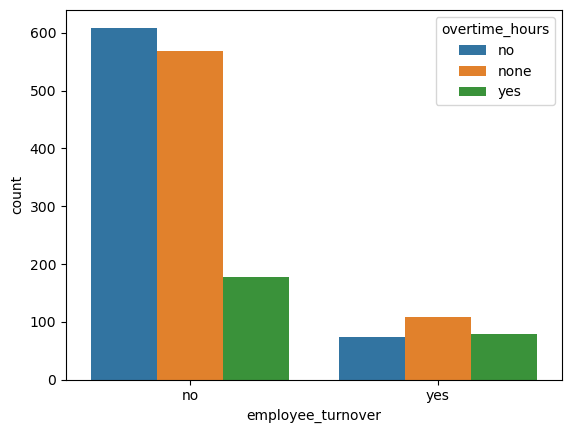

In [23]:
sns.countplot(x='employee_turnover',hue = 'overtime_hours',data=df_categ)

#### COMENTAR GRÁFICA

## ROTACIÓN DE EMPLEADOS EN FUNCIÓN DE LA JORNADA LABORAL

<Axes: xlabel='employee_turnover', ylabel='count'>

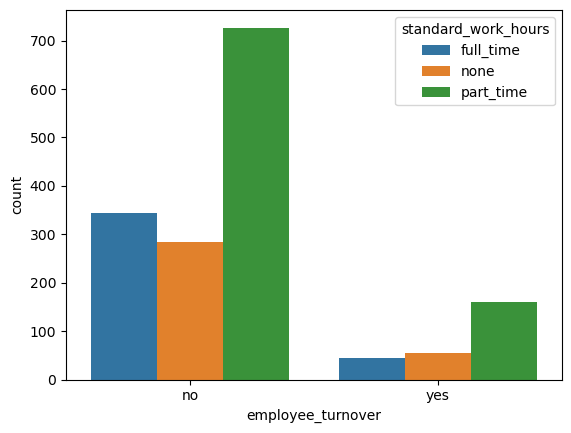

In [24]:
sns.countplot(x='employee_turnover',hue = 'standard_work_hours',data=df_categ)

### COMENTAR GRÁFICA

## ROTACIÓN DE EMPLEADOS EN FUNCIÓN DE TELE_TRABAJO

<Axes: xlabel='employee_turnover', ylabel='count'>

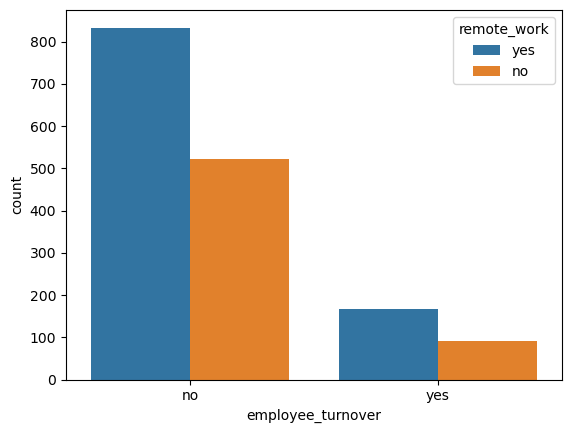

In [25]:
sns.countplot(x='employee_turnover',hue = 'remote_work',data=df_categ)

### COMENTAR GRÁFICA

🔍 Observaciones de los Gráficos

    Género vs. Rotación

        Parece que hombres y mujeres tienen niveles de rotación similares, aunque hay más hombres en la muestra.

    Trabajo Remoto vs. Rotación

        La mayoría de los empleados trabajan en remoto, y la rotación no parece variar mucho entre los grupos.

    Horas Extra vs. Rotación

        Hay más empleados que no hacen horas extra, pero los que sí hacen parecen tener una rotación mayor.

        Esto sugiere que las horas extra podrían estar relacionadas con el desgaste y la rotación.

    Frecuencia de Viajes vs. Rotación

        Hay muchos valores "unknown", lo cual dificulta el análisis.

        Los empleados que viajan con más frecuencia parecen tener mayor rotación que los que no viajan.

    Estado Civil vs. Rotación

        Hay muchos valores "unknown".

        Parece que los empleados solteros tienen más rotación que los casados/divorciados.

### MEDICIONES COLUMNAS DE SATISFACCIÓN

In [26]:
df_analisis.columns

Index(['employee_turnover', 'business_travel_frequency',
       'distance_from_home_km', 'education_level',
       'environmental_satisfaction_level', 'gender', 'job_involvement_level',
       'job_level', 'job_satisfaction_level', 'marital_status',
       'num_companies_worked', 'overtime_hours', 'percent_salary_hike',
       'standard_work_hours', 'stock_option_level',
       'training_sessions_last_year', 'years_at_company',
       'years_with_current_manager', 'birth_year', 'remote_work',
       'total_years_worked', 'annual_salary', 'work_life_balance'],
      dtype='object')

In [27]:
df_satisf = df_analisis[['environmental_satisfaction_level', 'job_involvement_level','job_satisfaction_level', 'work_life_balance']]

In [28]:
df_satisf.describe().T

,count,mean,std,min,25%,50%,75%,max
environmental_satisfaction_level,1614.0,2.731722,1.065969,1.0,2.0,3.0,4.0,4.0
job_involvement_level,1614.0,2.739777,0.711567,1.0,2.0,3.0,3.0,4.0
job_satisfaction_level,1614.0,2.738538,1.106163,1.0,2.0,3.0,4.0,4.0
work_life_balance,1614.0,2.775713,0.681347,1.0,2.0,3.0,3.0,4.0


## COMENTAR NOE

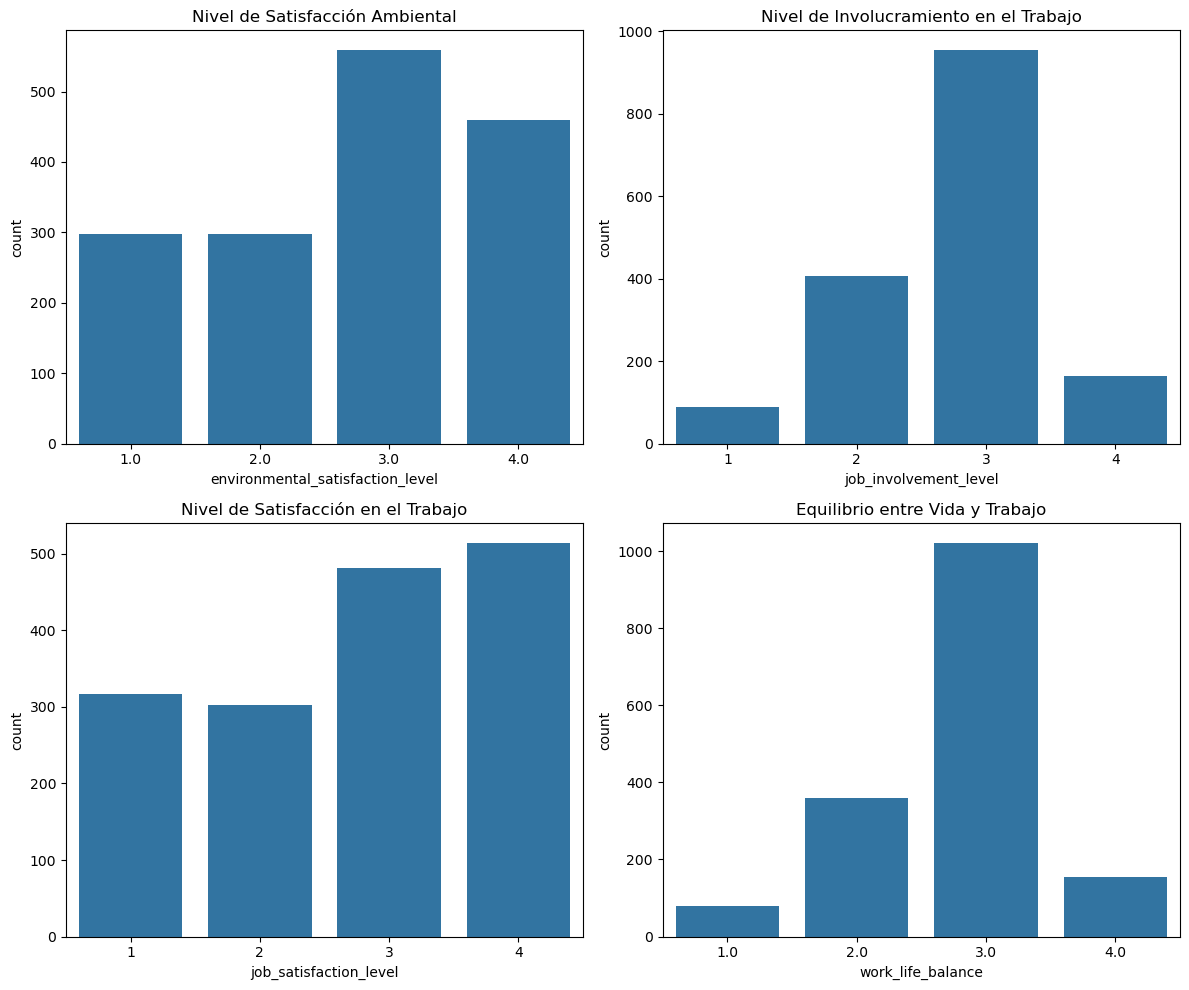

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear subgráficos para cada columna de satisfacción
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # 2 filas, 2 columnas

# Graficar cada columna en un subgráfico
sns.countplot(data=df_analisis, x='environmental_satisfaction_level', ax=axes[0, 0])
axes[0, 0].set_title('Nivel de Satisfacción Ambiental')

sns.countplot(data=df_analisis, x='job_involvement_level', ax=axes[0, 1])
axes[0, 1].set_title('Nivel de Involucramiento en el Trabajo')

sns.countplot(data=df_analisis, x='job_satisfaction_level', ax=axes[1, 0])
axes[1, 0].set_title('Nivel de Satisfacción en el Trabajo')

sns.countplot(data=df_analisis, x='work_life_balance', ax=axes[1, 1])
axes[1, 1].set_title('Equilibrio entre Vida y Trabajo')

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()

#### COMENTAR GRÁFICAS NOE

### ANÁLISIS DE LOS NIVELES DE SATISFACCIÓN CON RESPECTO AL ABANDONO DE LOS EMPLEADOS

In [30]:
df_analisis.columns

Index(['employee_turnover', 'business_travel_frequency',
       'distance_from_home_km', 'education_level',
       'environmental_satisfaction_level', 'gender', 'job_involvement_level',
       'job_level', 'job_satisfaction_level', 'marital_status',
       'num_companies_worked', 'overtime_hours', 'percent_salary_hike',
       'standard_work_hours', 'stock_option_level',
       'training_sessions_last_year', 'years_at_company',
       'years_with_current_manager', 'birth_year', 'remote_work',
       'total_years_worked', 'annual_salary', 'work_life_balance'],
      dtype='object')

### REALIZAR CROSSTAP DE LAS COLUMNAS DE SATISFACCIÓN PATRI